In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/winequality-red.csv' , sep = ';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
x = df.drop('quality' , 1).values

In [7]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [8]:
y1 = df['quality'].values

In [9]:
y1

array([5, 5, 5, ..., 6, 5, 6])

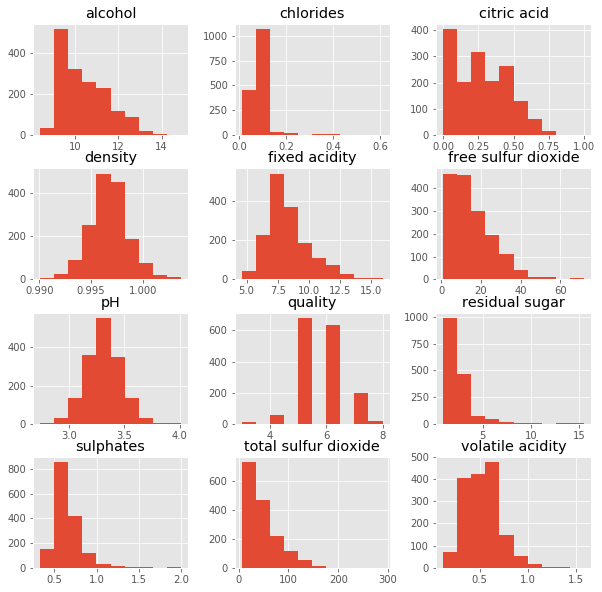

In [12]:
pd.DataFrame.hist(df, figsize = [10,10]);

## Without pre-processing

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model_1 = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))
print('k-NN score for training set: %f' % knn_model_1.score(X_train, y_train))
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

k-NN accuracy for test set: 0.612500
k-NN score for training set: 0.774042
              precision    recall  f1-score   support

       False       0.66      0.64      0.65       179
        True       0.56      0.57      0.57       141

   micro avg       0.61      0.61      0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320



## With Pre-processing

In [44]:
from sklearn.preprocessing import scale
Xs = scale(X)
from sklearn.model_selection import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
knn_model_2 = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_2.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))
y_true, y_pred = y_test, knn_model_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

k-NN score for test set: 0.712500
k-NN score for training set: 0.814699
              precision    recall  f1-score   support

       False       0.72      0.79      0.75       179
        True       0.70      0.62      0.65       141

   micro avg       0.71      0.71      0.71       320
   macro avg       0.71      0.70      0.70       320
weighted avg       0.71      0.71      0.71       320

